# Exercise 1

a)

$$
\begin{align}
{}^{o}l = {}_r^{o}T \ {}^{r}l
\end{align}
$$

b)

$$
\begin{align}
{}^{r}l = ({}_r^{o}T)^{-1} \ {}^{o}l = {}_o^{r}T \ {}^{o}l
\end{align}
$$

c) Assume P is a point in homogeneous coordinates. 

$$
\begin{align}
{}^{o}P &= {}^{o}T_1 \ {}^{1}P = {}^{o}T_2 \ {}^{2}P \\
{}^{1}P &= ({}^{o}T_1)^{-1} \ {}^{o}T_2 \ {}^{2}P \\
T_{12} &= ({}^{o}T_1)^{-1} \ {}^{o}T_2  
\end{align}
$$

d)
$$
\begin{align}
{}^{2}l = (T_{12})^{-1} \ {}^{1}l
\end{align}
$$

# Exercise 2

In [1]:
import numpy as np

X_robot = np.array([1.0, 0.5, np.pi/4.0],dtype = np.float)
# X_robot is in [x, y, θ]
sensor_mount = np.array([0.2, 0.0, np.pi],dtype = np.float)

# reading the sensor data
import math
import numpy as np
scan = np.loadtxt('laserscan.dat')
angle = np.linspace(-math.pi/2, math.pi/2, np.shape(scan)[0], endpoint=True)

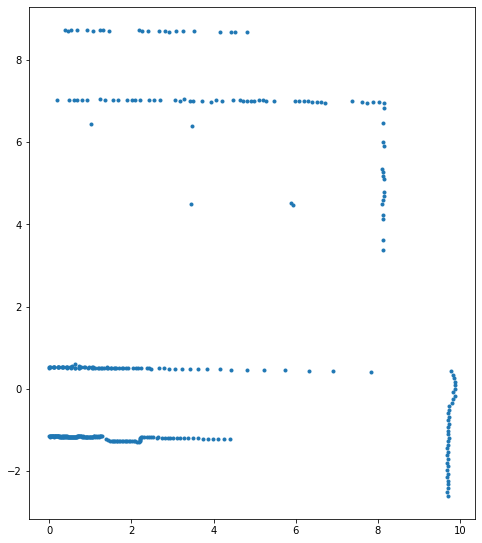

In [2]:
def polar_to_cartesian(angles, ranges):
    assert (angles.shape == ranges.shape)
    res = np.zeros((2, angles.shape[0]))
    res[0,:] = ranges * np.cos(angles)
    res[1,:] = ranges * np.sin(angles)
    return res

XY = polar_to_cartesian(angle, scan)

import matplotlib.pyplot as plt
plt.figure(figsize=(8,10))
plt.plot(XY[0,:], XY[1,:], '.')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [3]:
def vector_2_transofrmation_matrix(vector_x_y_θ):
    x = vector_x_y_θ[0]
    y = vector_x_y_θ[1]
    θ = vector_x_y_θ[2]
    return np.array([[math.cos(θ), -math.sin(θ), x],
                     [math.sin(θ),  math.cos(θ), y],
                     [0.0,          0.0,         1.0]],
                    dtype = np.float)
t_sensor_2_robot = vector_2_transofrmation_matrix(sensor_mount)
print(t_sensor_2_robot)
t_robot_2_world = vector_2_transofrmation_matrix(X_robot)
print(t_robot_2_world)

[[-1.0000000e+00 -1.2246468e-16  2.0000000e-01]
 [ 1.2246468e-16 -1.0000000e+00  0.0000000e+00]
 [ 0.0000000e+00  0.0000000e+00  1.0000000e+00]]
[[ 0.70710678 -0.70710678  1.        ]
 [ 0.70710678  0.70710678  0.5       ]
 [ 0.          0.          1.        ]]


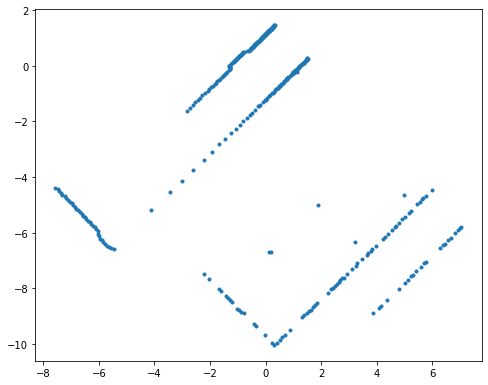

In [13]:
XY_global_frame = t_robot_2_world @ t_sensor_2_robot @ np.concatenate([XY, np.ones((1,XY.shape[1]),dtype=np.float)] )
plt.figure(figsize=(8,10))
plt.plot(XY_global_frame[0,:], XY_global_frame[1,:], '.')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()